<h2>Dengue Analysis</h2>
<hr>
<h3>Analyst: John Paul Cortes</h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dengue/dengue.csv')
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


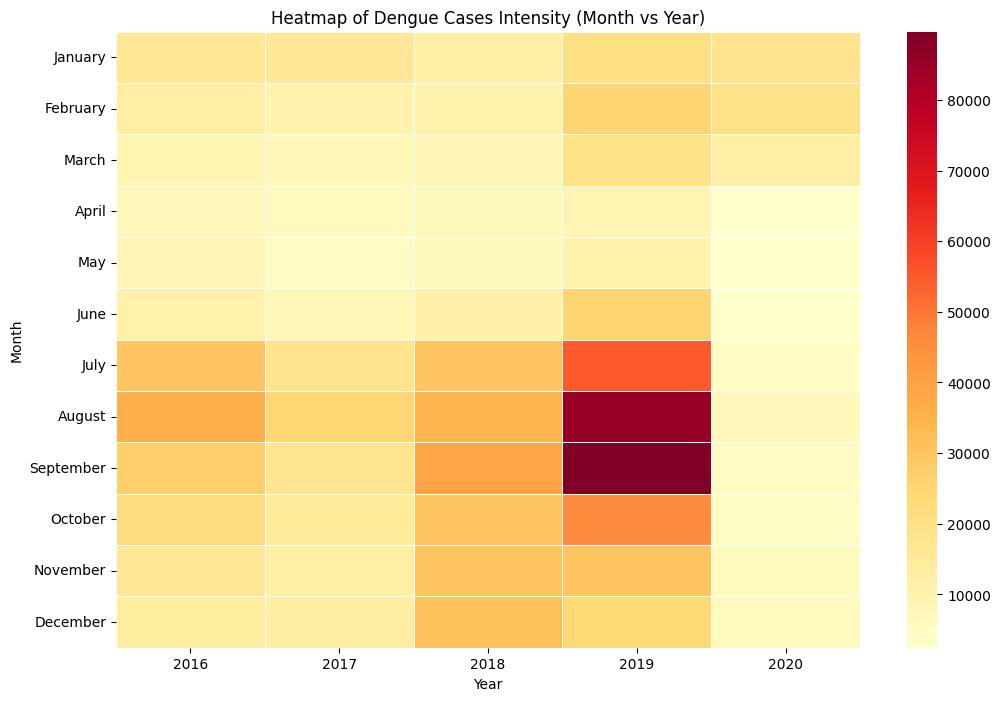

In [5]:
pivot_table = df.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc='sum')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, linewidths=.5)
plt.title('Heatmap of Dengue Cases Intensity (Month vs Year)')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

<h2>Insight #1</h2>
<hr>

<p>The heatmap visually confirms that 2019 was an anomaly, where the color intensity is significantly darker across almost all months compared to previous years, indicating that the outbreak was not just seasonal but persistent throughout the year.</p>

<h2>Insight #2</h2>
<hr>

 <p>A vertical gradient is visible across most years, where colors shift from light yellow in the first quarter (Jan-April) to darker orange/red in Q3 (July-Sept), reinforcing the strong seasonal dependence of the virus regardless of the total annual volume.</p>

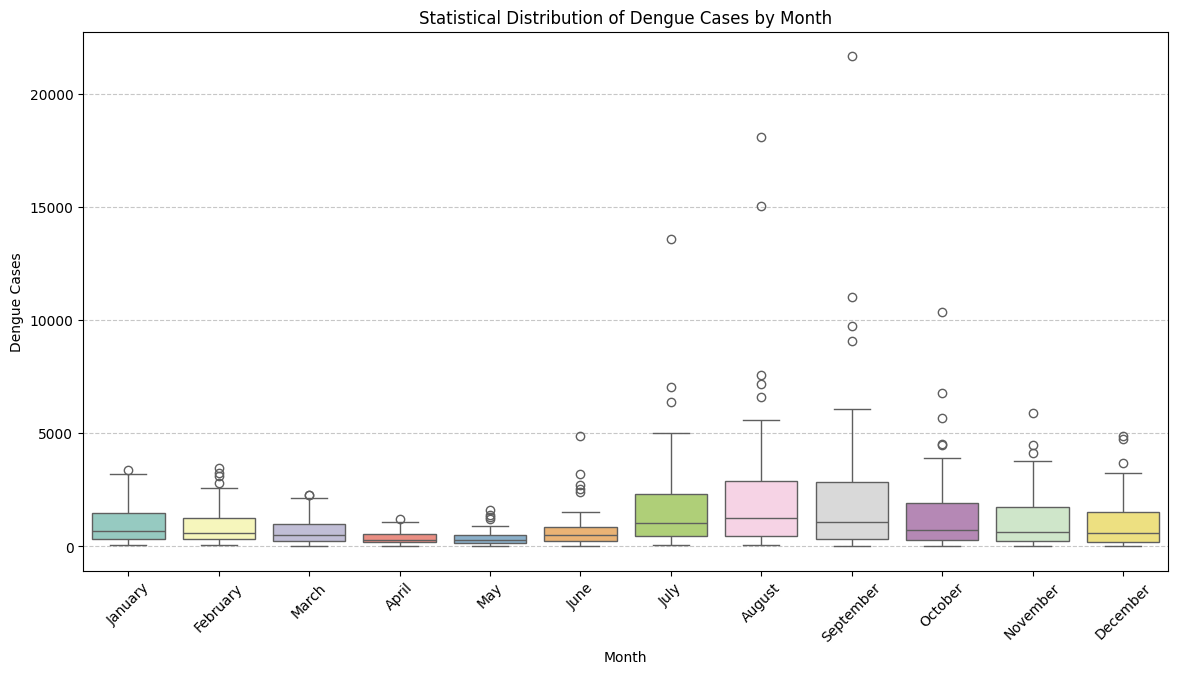

In [6]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Dengue_Cases', data=df, palette='Set3', order=month_order)
plt.title('Statistical Distribution of Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Insight #3</h2>
<hr>

<p>The months of August and September not only have the highest medians (the line inside the box) but also the largest Interquartile Range (the size of the box), meaning these months are the most unpredictable and volatile in terms of case load.</p>

<h2>Insight #4</h2>
<hr>

<p>The presence of extreme outliers (dots far above the whiskers) in the second half of the year indicates that while most years follow a standard pattern, "super-spreader" events or massive outbreaks occur almost exclusively during the rainy season.</p>

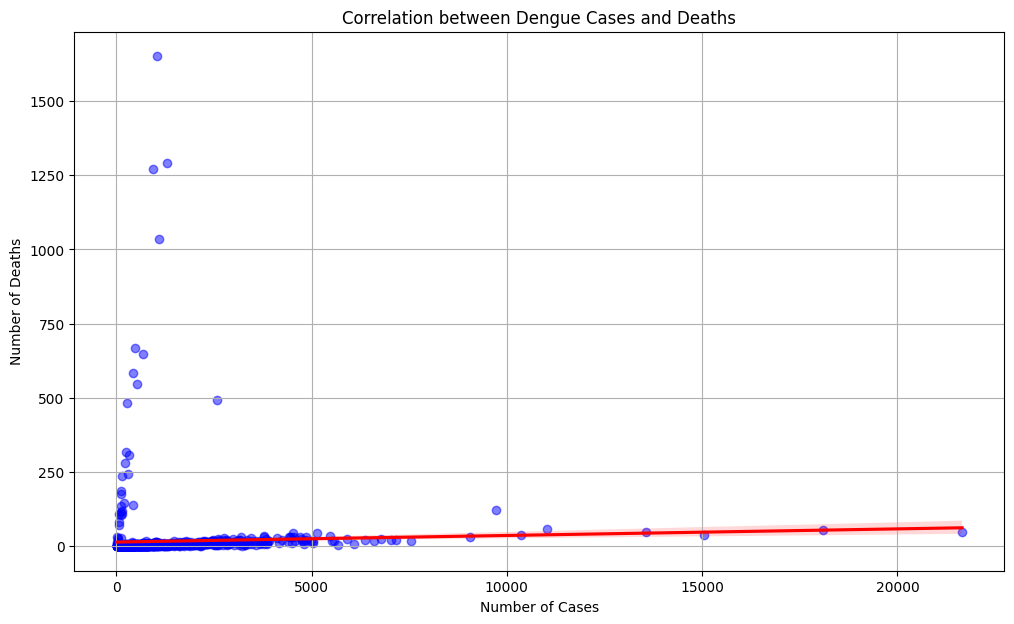

In [7]:
plt.figure(figsize=(12, 7))
sns.regplot(x='Dengue_Cases', y='Dengue_Deaths', data=df, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Correlation between Dengue Cases and Deaths')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

<h2>Insight #5</h2>
<hr>

<p>There is a positive linear correlation between cases and deaths, but the data points become more scattered as the number of cases increases. This suggests that as hospitals become overwhelmed during high-case months, the mortality outcome becomes more variable.</p>

<h2>Insight #6</h2>
<hr>

<p>There are several data points below the regression line at the higher end of the X-axis (high cases, relatively lower deaths). These points likely represent the 2019 outbreak where, despite high infection rates, improved clinical management kept the death ratio lower than expected.</p>

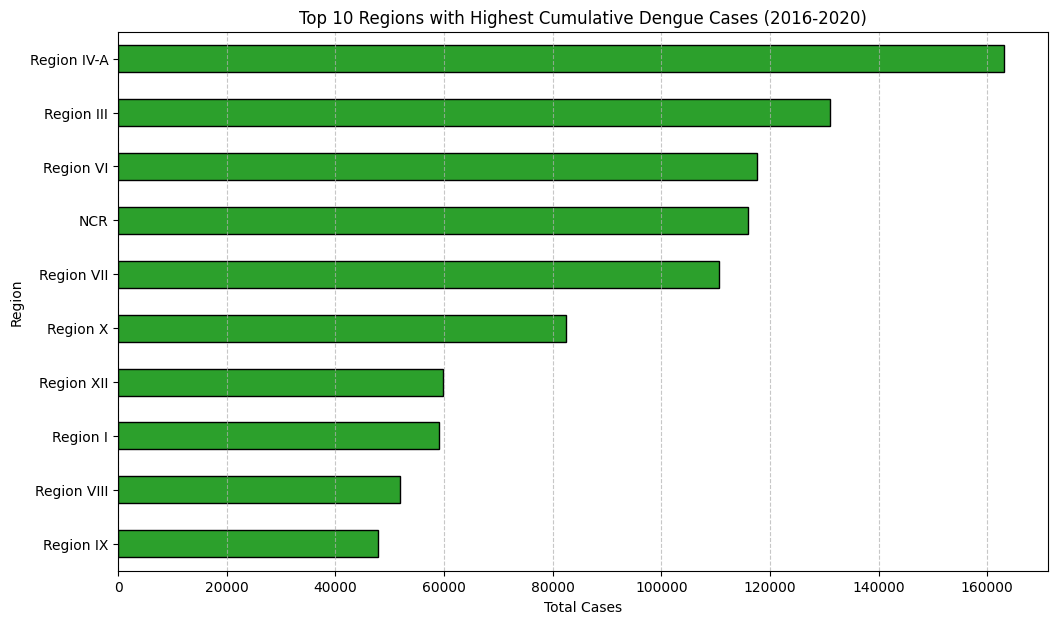

In [9]:
top_regions = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 7))
top_regions.plot(kind='barh', color='#2ca02c', edgecolor='black')
plt.title('Top 10 Regions with Highest Cumulative Dengue Cases (2016-2020)')
plt.xlabel('Total Cases')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h2>Insight #7</h2>
<hr>

<p>Region IV-A (CALABARZON) is the clear epicenter, accumulating significantly more cases than the next highest region. This suggests that vector control efforts in this specific region would yield the highest return on investment for national health statistics.</p>

<h2>Insight #8</h2>
<hr>

<p>The gap between the top 3 regions (IV-A, III, NCR) and the rest of the top 10 is substantial. These three regions combined effectively represent the "Dengue Belt" of the Philippines, likely due to their proximity, high population density, and high mobility between provinces</p>

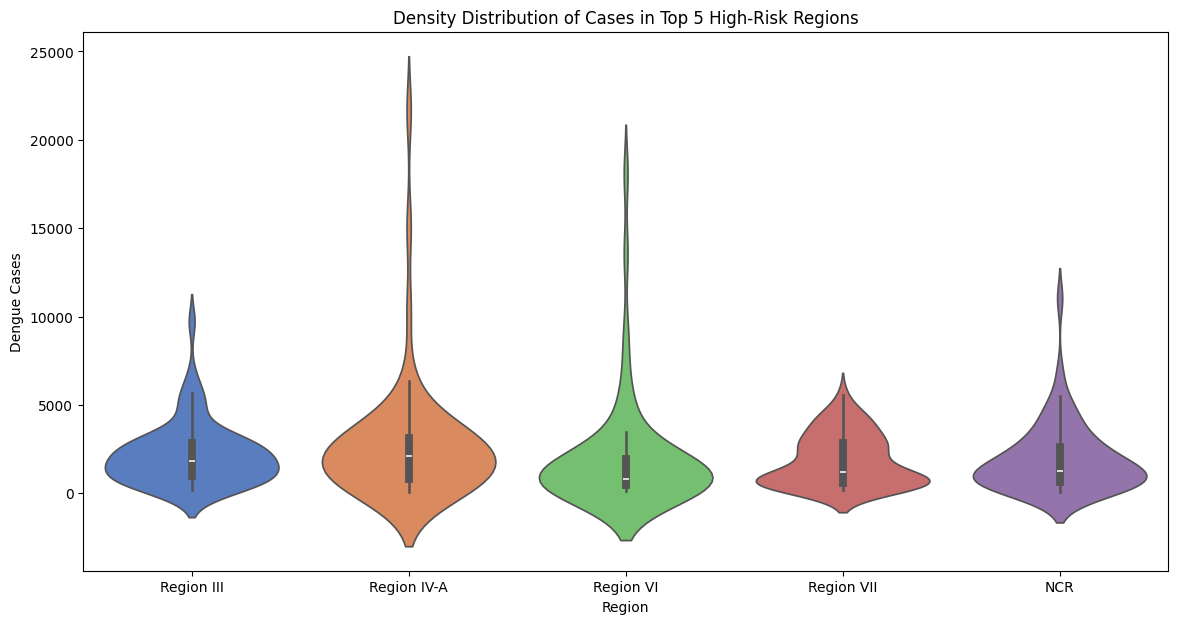

In [11]:
top_5_regions_list = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(5).index
subset_df = df[df['Region'].isin(top_5_regions_list)]

plt.figure(figsize=(14, 7))
sns.violinplot(x='Region', y='Dengue_Cases', data=subset_df, palette='muted')
plt.title('Density Distribution of Cases in Top 5 High-Risk Regions')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.show()

<h2>Insight #9</h2>
<hr>

<p>The "long tails" extending upwards for NCR and Region IV-A indicate that these regions are prone to extreme outlier events (massive outbreaks) compared to Region VI, which has a "wider" base, indicating a more consistent, steady stream of cases without as many extreme spikes.</p>

<h2>Insight #10</h2><hr>

<p>The bulge (width) of the violins is concentrated near the bottom for all regions. This implies that for the vast majority of months, dengue cases remain relatively low and manageable, but the potential for explosive growth (the thin upper necks of the violins) is always present in these urbanized hubs.</p>